In [3]:
# The cost of retaining an existing customer is far less than aquiring a new one.
# This project uses a decsion tree & logistic regression models to make predictions on customer churn 
# for a telecommunications company. 
# The topic of overfitting is discussed and the decision tree is visualized for analysis. 
# The decision tree model is then compared to a logistic regression model to make predictions for customer churn.
# Lastly, the project will improve the performance of the decision tree  model through Cross Validation, Ensembles Methods 
# (Bagging, Boosting, Random Forest), & Hyperparameter tuning (Grid search). 


In [ ]:
# A customer churn analysis (CHURN: if a customer left within the last month).
# Services that each customer has signed up for include phone, multiple lines, Internet, online security, online backup, 
# device protection, tech support, and streaming TV and movies. 
# Customer account information includes tenure (how long they've been a customer), contract, payment method, 
# paperless billing, monthly charges, and total charges. 
# The demographic information about customers includes gender, age range, and if they have partners and dependents.

In [1]:
# Created a dataframe and named it "churn."
# Read data into pandas dataframe. Use "pd.read_csv" function to read the 
# Portfolio Project Customer-Churn-Telco-Dataset.csv file into the IDE 
# (Slashes within the path must face the correct direction "/").

import pandas as pd
churn = pd.read_csv("C:/Users/melis/OneDrive/Documents/Portfolio Project Churn/Portfolio Project Customer-Churn-Telco-Dataset.csv")

In [5]:
# Used "shape" method to look at the dimensions of the data. The "shape method" from pandas 
# can be used to see the number of rows and columns. There are 7032 rows and 20 columns.
# In otherwords, there are 7032 instances and 20 variables including the target variable. 

churn.shape 

(7032, 20)

In [26]:
# Use "head" method to look at the 1st several rows of data.

churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,no,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,no,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,no,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,no,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,no,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
# Use "dtypes" method to look at the data types for each of the variables.

churn.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [28]:
# Use "isnull" to check if there are missing values in the Churn Dataframe. 
# There are no mising values 

churn.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0      False          False    False       False   False         False   
1      False          False    False       False   False         False   
2      False          False    False       False   False         False   
3      False          False    False       False   False         False   
4      False          False    False       False   False         False   
...      ...            ...      ...         ...     ...           ...   
7027   False          False    False       False   False         False   
7028   False          False    False       False   False         False   
7029   False          False    False       False   False         False   
7030   False          False    False       False   False         False   
7031   False          False    False       False   False         False   

      MultipleLines  InternetService  OnlineSecur

In [29]:
# Since the target variable (churn) has 2 distinct levels, yes & no, it could be helpful to know how many instances 
# have the target variable equal to "yes" and how many instances are equal to "no." 

churn['Churn'].value_counts ()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [2]:
# Since the predictors have categorical variables & the target variable is also a categorical variable perform 
# the labelencoding for all the categorical variables. For predictors use the "get_dummies" method to perform the 
# label encoding for all the categorical predictors in the Churn Dataframe. 

X = pd.get_dummies(churn.iloc[:, 0:19],drop_first=True)

In [7]:
# Take a look at the "X" object that was used to save the predictors of the label encoding.
# These categorical variables have now been converted in terms of integers. 

X

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,24,84.80,1990.50,1,0,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7028,72,103.20,7362.90,0,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7029,11,29.60,346.45,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7030,4,74.40,306.60,1,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [3]:
# Encoding the target variable. Use "labelEncoder" function from sklearn preprocessing module to do the labelencoding for 
# the target variable. Save the values from of the label encoding to the object "y." 
# Use the "fit_transform" method to perform the label encoding on the values of the target variable which is "churn" in 
# this Churn Dataframe. 

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(churn['Churn'].values)

In [4]:
# After performing all the label encoding for all the categorical variables in the Churn Dataframe, the data needs
# to be split into the training set & test set. The decision tree model will be created from the training set & evaluated 
# on the test set. To split the data, make use of the "train_test_split" from "Sklearn.model_selection" module.
# Use 20% of the original data (test_size = 0.2) as the test set & the remaining 80% will be used for the training set.
# Set random_state parameter equal to zero to make sure that this random sampling procedure can be replicated in the future.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [5]:
# Create a Decision Tree Model 
# Build the model using the default setting of fully developing the tree (growing the tree until the leaves are pure) 
# which will demonstrate the problem of overfitting.
# Import Decision Tree Classifier Library to make a decision tree & name the decision tree model as "tree."
# Specify the "random_state" parameter because the features are randomly selected for each of the split.

from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier (random_state = 0)

# Use the "fit" method to apply the this decision tree to the training set.
# Specify the predictors in the training set as "X_train" & specify the target variable in the training set as "y_train."

tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [11]:
# Use the "score" method to calculate the the model accuracy on the training set, .998 means a very good performance on 
# the training set. The model accuracy is close to 1 which means that the decison tree model on the training set makes 
# a perfect prediction regarding if a customer will churn or not. BUT we cannot make a conclusion that the model 
# performs perfectly until the decision tree model is applied to the test set. It is unknown if this good model performance 
# on the training set can be generalized to a new set of data so we need to apply this decision tree model to the 
# test set to validate it. 

print ("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

Accuracy on training set: 0.998


In [6]:
# Create a object called y_pred
# Use the predict method of this decision tree classfier & apply this decision tree model to the predictors in the test set.

y_pred = tree.predict(X_test)

In [13]:
# Use the "print" function to show the accuracy on the test set 
# Use the accuracy score the Sklearn.metrics module to calculate the accuarcy set 
# Use the "format" method to define to keep the 3 digits after the decimal point. 
# After the Format method, within the parenthesis, specify the predicted classes in the test set & 
# the actual value for the target variable in the test set.
# `The output of the accuracy score shows us that the accuracy on the test set is about .733. Notice, there is a significant
# reduction of the model accuracy on the test set compared to the model accuracy on the training set. This means the model
# has an issue of overfitting. In other words, this decision tree model did a perfect job of memorizing the features in 
# the training set but it cannot be generalized, it cannot be applied to a new dataset to make a good prediction. So we need
# to figure out another methodthat can be used to deal w/the issue of overfitting in the data mining model. 

from sklearn.metrics import accuracy_score
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on test set: 0.733


In [40]:
# Before addressing thee issue of overfitting, see confusion matrix on the test set.
# To construct a confusion matrix, import this confusion matrix from the "sklearn_metrics" module.
# The confusion matrix will return a matrix showing the number of true positives, true negatives, 
# false negatives, & false positives.

from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[846 192]
 [183 186]]


C:\Users\melis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


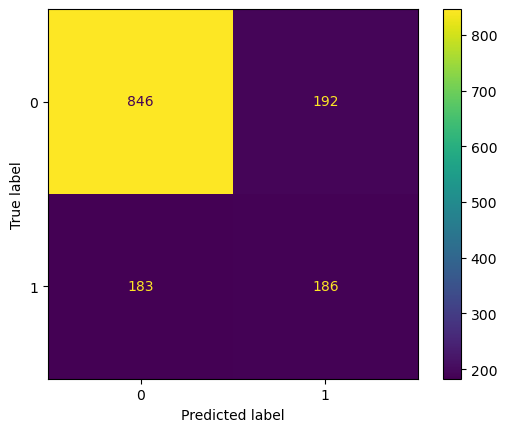

In [41]:
# Another way to interpret the confusion matrix is to visualize it using the "plot_confusion_matrix" method that can
# be imported from from Sklearn.metrics
# On the second line, use the plot_confusion_matrix. in the parenthesis specify the decision tree model created (tree), 
# specify the predictors in the test set (X_test), and lastly, specify the actual target variable in the test set (y_test).
# A confusion matrix is used to measure accuracy, the ratio of correct predictions to the total number of predictions. 
# If we want to calculate the model's accuracy manually we can use the following formula: 
# Accuracy = TP + TN/ total # of instances in the test set
# On the axis, 1 indicates "churn" & 0 indicates "no churn" in our data context.
# The "True Label" rows is the actual value of the target variable while "Predicted label" columns are the predicted
# value for the target varable
# Notice, there are 846 customers who did not & were predcited as no churn which is a true negative.
# There are 192 customers who did not churn but they were incorrectly classified as "churn" which is a false positive.
# There are 183 customers who "churned" but they were incorrectly classified as "not churn" which is a false negative.
# There are 186 customers who actually churned & were predicted to "churn" which is a  true positive.

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(tree,X_test, y_test)

In [42]:
# The difference between the accuracy on the training set and accuracy on the test set (.998 VS .733) indicates an issue of 
# overfitting from when we created the decision tree with all the parameters set at the default values.
# The reason that we have an overfitting problem is because this allowed the tree grow as 
# large as possible until all the leaves are pure, meaning our decision tree model perfectly memorized the labels on 
# the training data but it cannot be generalized to other new sets of data. This is why the accuracy on the training set is
# close to 100%. If we don't restrict the depth of the decision tree, the tree can become arbitrarily deep and complex.
# Unpruned trees are therefore prone to overfitting and don't generalize well to new data.

print ("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print ("Accuracy on test set: {:.3f} ".format(accuracy_score(y_pred, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.733 


In [7]:
# Now apply pre-pruning to the tree which will stop developing the tree before we perfectly fit it to the training data. 
# One option is to stop building the tree after a certain depth has been reached. 
# Save the newly created tree into the "tree_pruned" object.
# Set max_depth=4. Limiting the depth of the tree decreases over fitting. This leads to a lower accuracy on the training set
# but an improvement on the test set. 


tree_pruned = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_pruned.fit(X_train, y_train)
y_pruned_pred = tree_pruned.predict(X_test)

In [15]:
# Look at the accuracy score on the training set and test set.
# This time, we have a more reliable model accuracy on the training set. This shows us that when a decision tree model 
# has the issue of overfitting, we can prune the tree by setting some of the parameters to limit the size of the tree 
# to avoid the issue of overfitting.

from sklearn.metrics import accuracy_score
print ("Accuracy on training set: {:.3f}".format(tree_pruned.score(X_train, y_train)))
print ("Accuracy on test set: {:.3f} ".format(accuracy_score(y_pruned_pred, y_test)))

Accuracy on training set: 0.791
Accuracy on test set: 0.785 


In [16]:
# It may be helpful to know the importance of the predictors in predicting if a customer is going to churn or not.
# Interpret the tree by the variable importamce in the decision tree. To do this, create a dataframe called "importance."
# Use "pd.DataFrame" function to create a data frame to show the importance of each of the predictors in the model.
# Save the importance value for each of the predictors in the feature importance attribute of a decision tree classifier.
# Using "index =" label each row using "predictor names," and then label "columns=" as "importance."
# The higher the importance number the more important the variable is in predicting the target variable. 
# The most important variables here are tenure, MonthlyCharges, & TotalCharges.

importance = pd.DataFrame(tree.feature_importances_, index = X.columns, columns= ["Importance"])
importance

,Importance
tenure,0.202008
MonthlyCharges,0.198780
TotalCharges,0.197211
gender_Male,0.025480
SeniorCitizen_yes,0.021220
Partner_Yes,0.019240
Dependents_Yes,0.019740
PhoneService_Yes,0.000542
MultipleLines_No phone service,0.003927
MultipleLines_Yes,0.020589


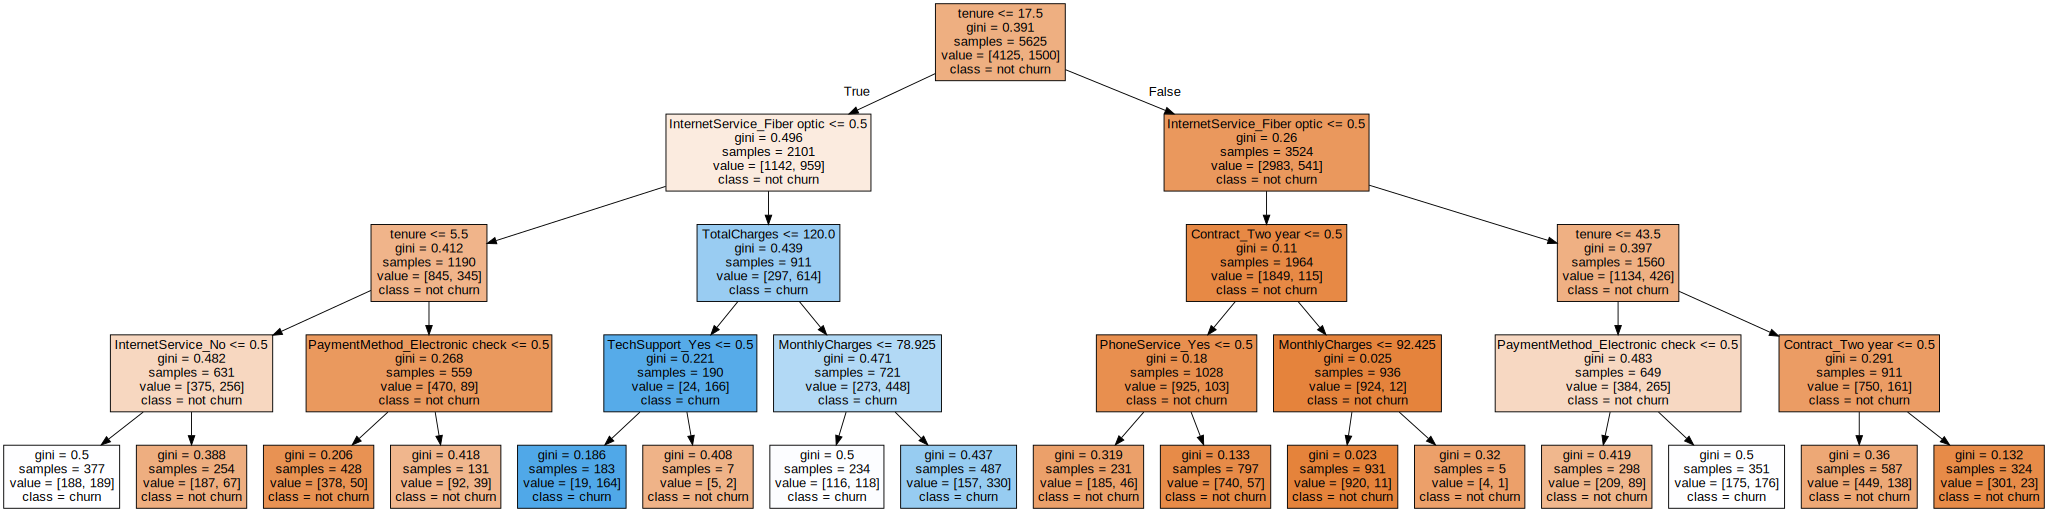

In [8]:
# Now, visualize the tree using the “export_graphviz” function from the tree module. This writes a file in the .dot file 
# format, which is a text file format for storing graphs. Set an option to color the nodes to reflect the majority class 
# in each node and pass the class and features names so the tree can be properly labeled.
# BUT 1st, some settings might need to install and import graphviz:

import graphviz
from sklearn import tree
from sklearn.tree import export_graphviz

dot_data = export_graphviz(tree_pruned, class_names= ["not churn", "churn"], feature_names=X_train.columns, filled = True)
graph = graphviz.Source(dot_data, format = "png")
graph

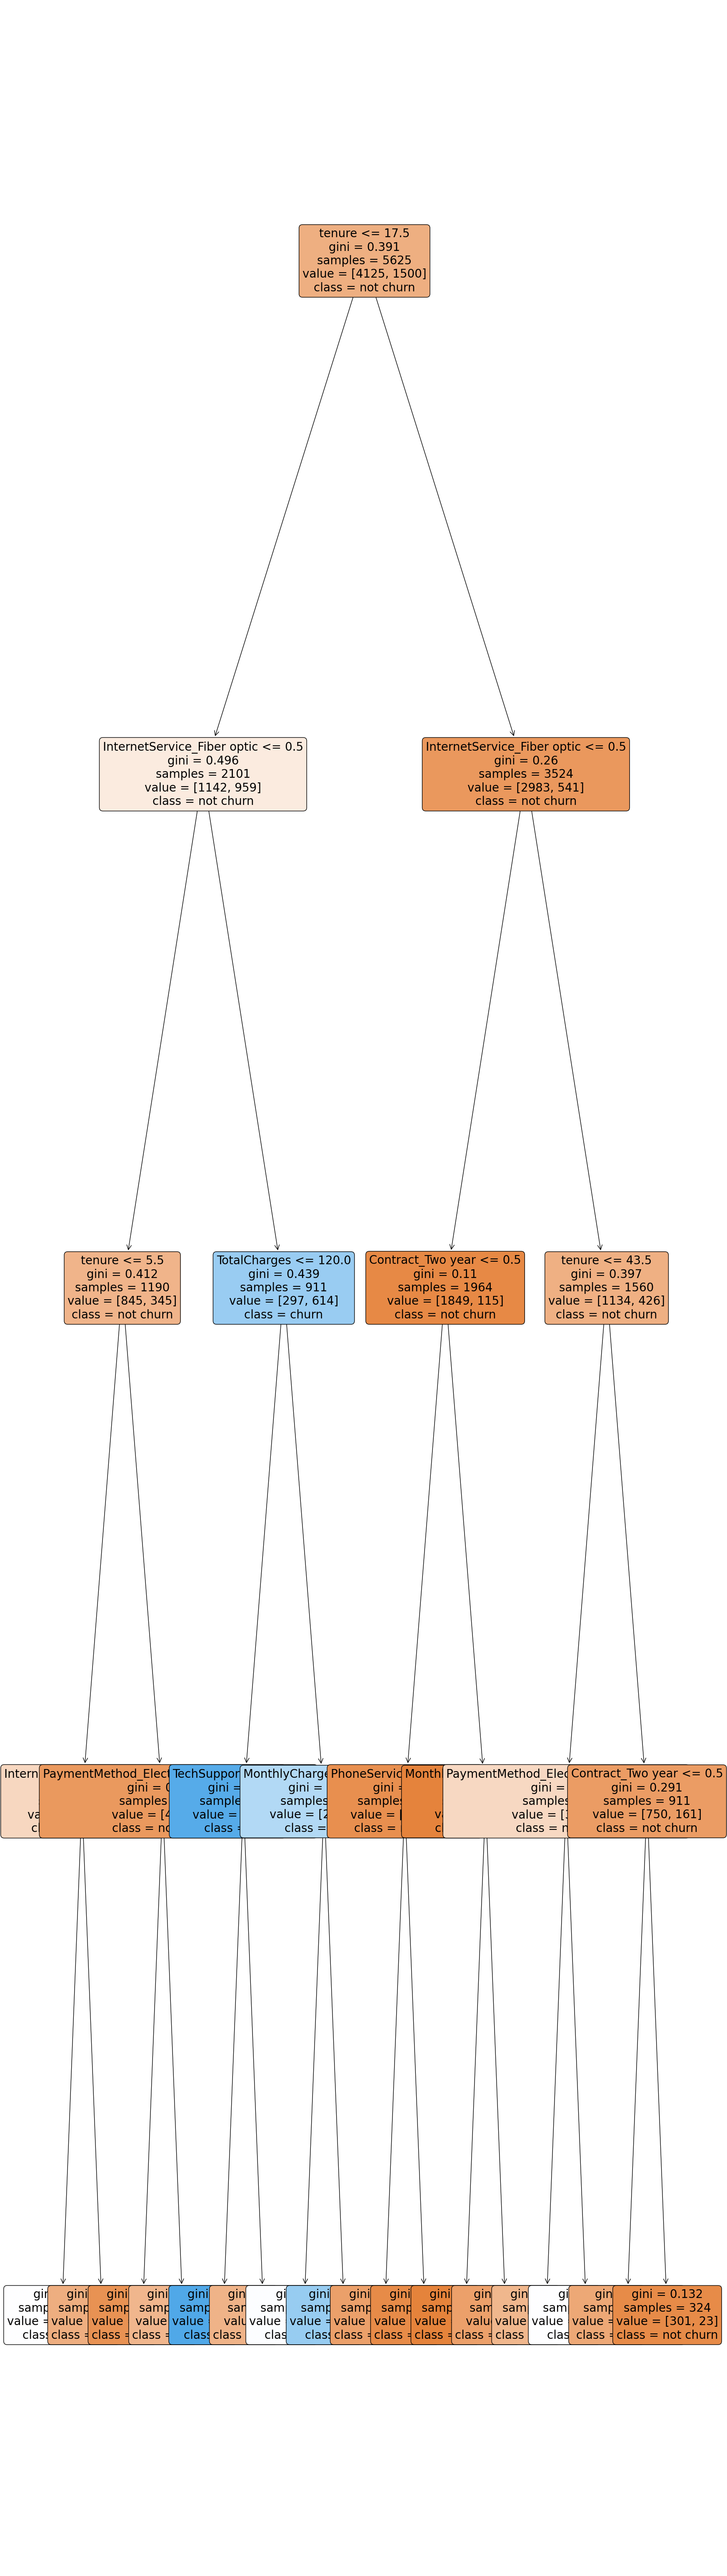

In [50]:
# Another common way to plot the tree using matplotlib.

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 80))
display_tree = plot_tree(tree_pruned, feature_names= X_train.columns, class_names = ["not churn","churn"], 
filled = True, rounded=True, fontsize=20)

In [18]:
# In addition to visualizing the decision tree we can also visualize the model performance using Roc curve & 
# calculating the value of AUC. To create the ROC curve & AUC score, we need to know the predicted
# probability for each instance in the test set. Make use of the "predict_proba"  method of this decision tree 
# classifier "tree_pruned" to estimate the predicted probability for each instance in the test set. This will return an array showing the
# of the predicted probability for each instance to be classified as negative or positive.
# Keep probabilities for the positive outcome only.

tree_pruned.predict_proba(X_test)

array([[0.73622047, 0.26377953],
       [0.88317757, 0.11682243],
       [0.73622047, 0.26377953],
       ...,
       [0.4957265 , 0.5042735 ],
       [0.7649063 , 0.2350937 ],
       [0.88317757, 0.11682243]])

In [9]:
# To make use of the second column of this predicted probability array & save the predicted probability of Bing classified 
# as positive to this “y_pruned_pred_proba” object.
y_pruned_pred_proba = tree_pruned.predict_proba(X_test)[:,1]

NameError: name 'plt' is not defined

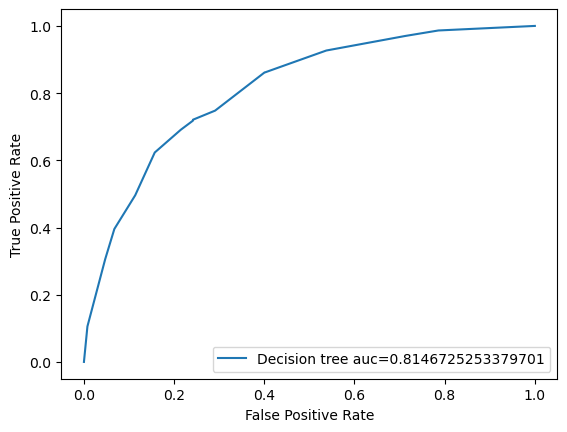

In [10]:
# Create ROC curve and calculate AUC value.
# Use "fpr, tpr, _" to create the ROC curve we need to pass 3 values: First Positive Rate, True Positive Rate, 
# & the threshhold. USe "roc_curve" function from Sklearn metrics. 
# Use the "auc =" to calculate the AUC score.
# Use ".plot" funtion to create the ROC curve.
# AUC value for the pruned decision tree model is about .81 which is not a bad AUC value.
# Gernerally speaking we want the ROC curve to be as close as possible to 1 indicating perfect discrimination between 
# the two classes by the model. That is, The closer the ROC curve is to the top-left corner, the better the model's 
# performance. We can consider applying other data mining models such as logistic, regression model, on the same customer
# churn data & compare the two models based on the AUC value. 

from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, _ = metrics.roc_curve(y_test, y_pruned_pred_proba) 
auc = metrics.roc_auc_score(y_test, y_pruned_pred_proba)
pyplot.plot(fpr, tpr,label = "Decision tree auc=" +str(auc)) 
pyplot.xlabel ('False Positive Rate')
pyplot.ylabel ('True Positive Rate')

# Show thed the legend
pyplot.legend ()
plt.show()

In [11]:
# ----------------------------------------Logistic Regression Model----------------------------------------------------------
# The 1st several steps will be exactly the same as the decision tree model. 
# Import the logistic Regression module & create a Logistic Regression Object using Logistic Regression () function.
# Then, fit the model on the training set using fit () and perform prediction on the test set using predict (). 

from sklearn.linear_model import LogisticRegression

# Instantiate the model (uisng the defaulgt parameters)
logreg = LogisticRegression(max_iter=200)

# Fit the model with data.
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [22]:
coef = pd.DataFrame(logreg.coef_[0], index = X.columns, columns = ['Coefficients'])
coef

,Coefficients
tenure,-0.062027
MonthlyCharges,0.005108
TotalCharges,0.000316
gender_Male,-0.003594
SeniorCitizen_yes,0.259270
Partner_Yes,0.033491
Dependents_Yes,-0.230044
PhoneService_Yes,-0.515536
MultipleLines_No phone service,0.283446
MultipleLines_Yes,0.246992


In [12]:
import numpy as np
df = pd.DataFrame(np.exp(logreg.coef_)[0], index = X_train.columns, columns = ['Odds'])
df.sort_values(by= ['Odds'], ascending = True)

,Odds
Contract_Two year,0.335871
Contract_One year,0.558307
PhoneService_Yes,0.597180
TechSupport_Yes,0.632848
OnlineSecurity_Yes,0.702426
PaymentMethod_Credit card (automatic),0.786407
Dependents_Yes,0.794499
OnlineBackup_Yes,0.812819
OnlineBackup_No internet service,0.923620
StreamingMovies_No internet service,0.923620


In [24]:
#Evaluate logistic regression model on the test set

y_pred=logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

In [25]:
print ("Accuracy::{:.3f}".format(metrics.accuracy_score(y_test,y_pred)))

Accuracy::0.807


C:\Users\melis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


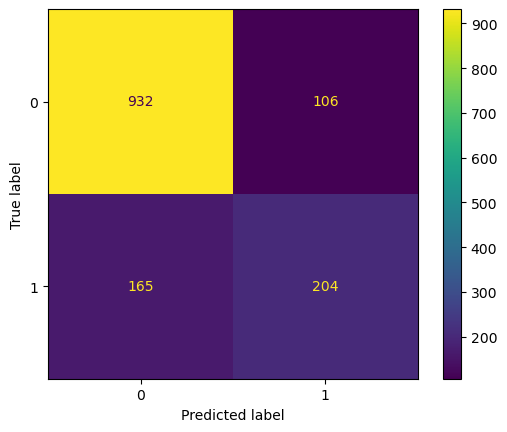

In [77]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(logreg, X_test, y_test)

NameError: name 'plt' is not defined

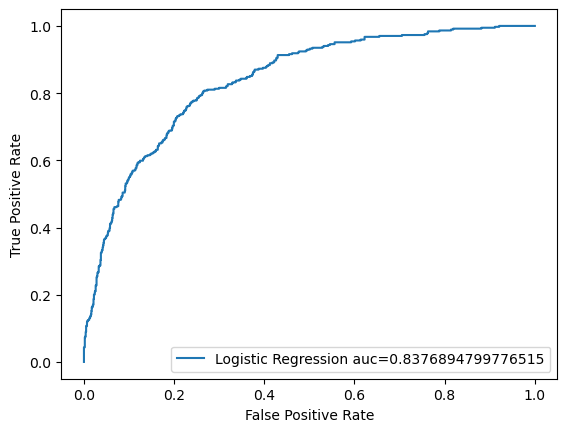

In [13]:
from matplotlib import pyplot
#keep probabilities for the positive outcome only
y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba) 
auc = metrics.roc_auc_score(y_test, y_pred_proba)
pyplot.plot(fpr, tpr,label = "Logistic Regression auc=" +str(auc)) 
pyplot.xlabel ('False Positive Rate')
pyplot.ylabel ('True Positive Rate')

# plt.legend (loc=4)
# Show the legend
pyplot.legend ()
plt.show()

In [14]:
X = pd.get_dummies(churn.iloc[:, 0:19], drop_first = True)
y = churn.iloc[:,19]

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder_churn = LabelEncoder()
y = labelencoder_churn.fit_transform(churn['Churn'].values)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state=0)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))


Accuracy on training set: 0.998
Accuracy on test set: 0.733


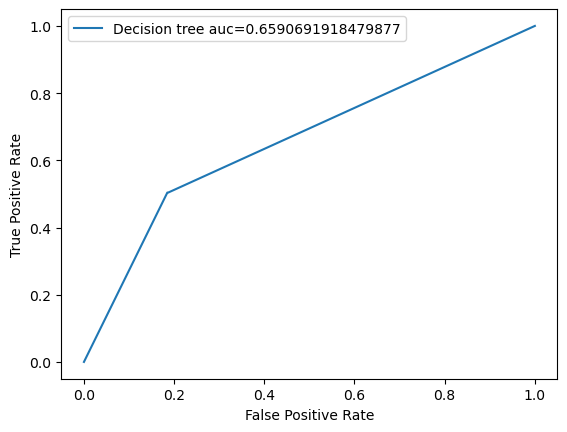

In [30]:
# Create ROC curve & calculate AUC score.
from matplotlib import pyplot as plt
from sklearn import metrics

y_pred_proba = tree.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

pyplot.plot(fpr, tpr, label="Decision tree auc="+ str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# Show legend
pyplot.legend()
plt.show()

C:\Users\melis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


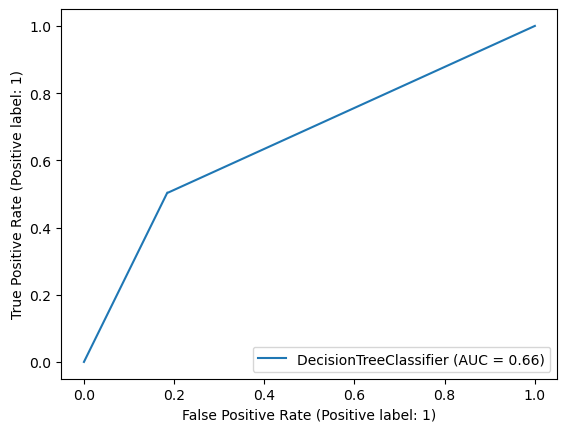

In [91]:
metrics.plot_roc_curve(tree, X_test, y_test)
plt.show()

In [18]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X, y, cv= 5)
print("Accuracy score of each fold {}".format(scores))

# A common way to summarize the cross validation accuracy is to compute the mean:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Accuracy score of each fold [0.73063255 0.72850036 0.72048364 0.72617354 0.74182077]
Average cross-validation score: 0.73


In [19]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(n_estimators=100, random_state=0)
bagging.fit(X_train, y_train)
y_bagging_pred = bagging.predict(X_test)

print("Bagging Model Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_bagging_pred)))

Bagging Model Accuracy on test set: 0.783


C:\Users\melis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


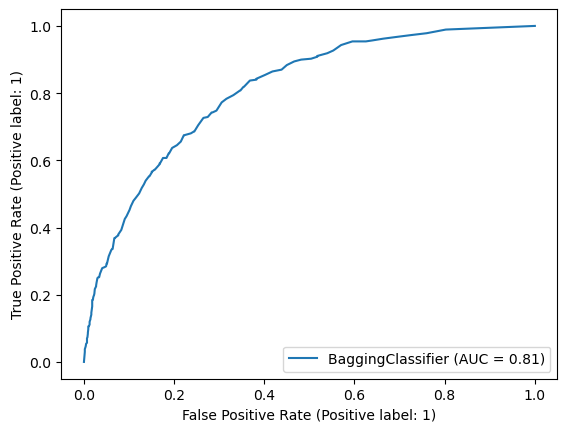

In [95]:
metrics.plot_roc_curve(bagging, X_test, y_test)
plt.show()

In [20]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(n_estimators = 100, random_state=0)
boost.fit(X_train, y_train)

y_boost_pred = boost_pred = boost.predict(X_test)
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_boost_pred, y_test)))

Accuracy on test set: 0.803


C:\Users\melis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


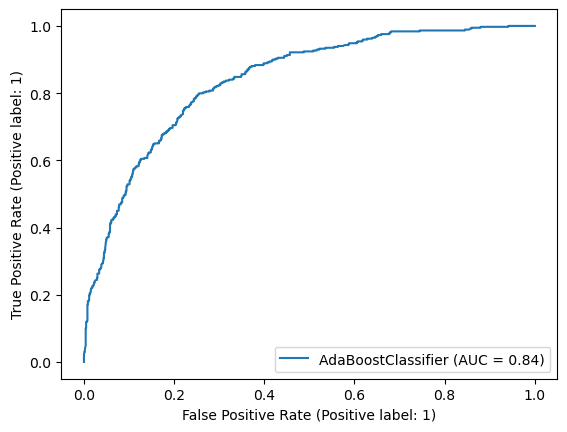

In [97]:
metrics.plot_roc_curve(boost, X_test, y_test)
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=1000, random_state=0)
forest.fit(X_train, y_train)

y_rf_pred = forest.predict(X_test)
print("Random Forest Accuracy on test set: {:.3f}".format(accuracy_score(y_test, y_rf_pred)))

Random Forest Accuracy on test set: 0.790


C:\Users\melis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


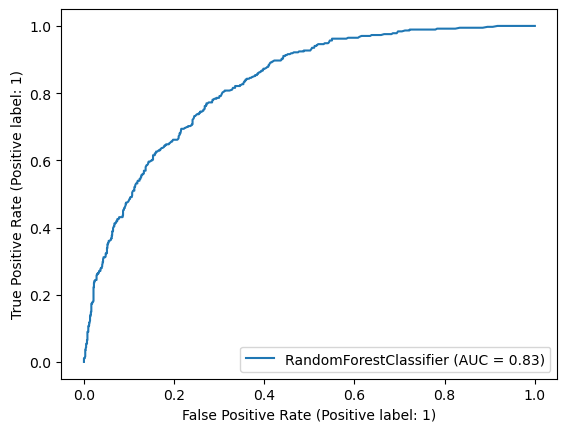

In [100]:
metrics.plot_roc_curve(forest, X_test, y_test)
plt.show()

In [36]:
importances = forest.feature_importances_

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
df = df.sort_values('importance')
print(df)

                                  feature  importance
8          MultipleLines_No phone service    0.004130
7                        PhoneService_Yes    0.004303
11                     InternetService_No    0.004718
12     OnlineSecurity_No internet service    0.004751
18        TechSupport_No internet service    0.004804
20        StreamingTV_No internet service    0.004937
14       OnlineBackup_No internet service    0.004942
22    StreamingMovies_No internet service    0.005043
16   DeviceProtection_No internet service    0.005076
29             PaymentMethod_Mailed check    0.012530
27  PaymentMethod_Credit card (automatic)    0.013361
21                        StreamingTV_Yes    0.016692
23                    StreamingMovies_Yes    0.017890
17                   DeviceProtection_Yes    0.018788
6                          Dependents_Yes    0.019888
9                       MultipleLines_Yes    0.020741
24                      Contract_One year    0.021087
4                       Seni

In [23]:
tree = DecisionTreeClassifier(random_state=0)
tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'], 'max_leaf_nodes': list(range(2, 50)), 'max_depth': np.arange(3, 15)}
tree_grid = GridSearchCV(tree,params, cv=10) 
tree_grid.fit(X_train, y_train)

In [ ]:
tree_grid.best_estimator

In [ ]:
y_pred_grid = tree_grid.predict(X_test)
print("Grid-search Model Accuracy on test set; {:.3f}".format(accuracy_score(y_test, y_pred_grid)))

C:\Users\melis\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


NameError: name 'plt' is not defined

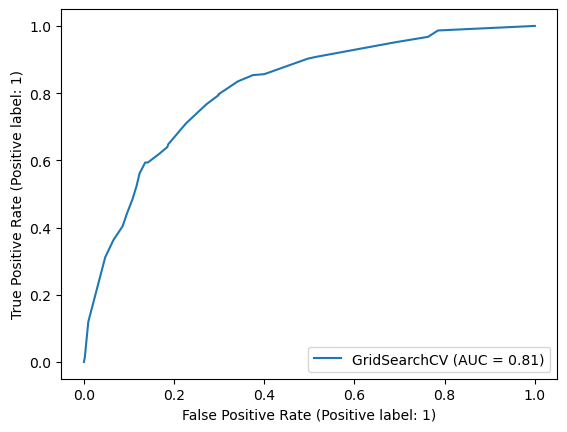

In [21]:
# If we use this "plot_roc_curve" function to visualize the ROC curve for this GridSearch model & estimate the AUC value, 
# we will get an AUC value for this model equal to .81
#So, there is significant improvement of the model performance compared to the single decision tree model that was 
# created previously

metrics.plot_roc_curve(tree_grid, X_test, y_test)
plt.show()